<a href="https://colab.research.google.com/github/Sonya-c/cryptography/blob/main/notebooks/proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **${\Large\text{Criptografía 2024-10 - Proyecto 1}}$**

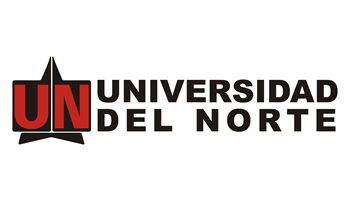

---

## **Nombre y Códigos de los Estudiantes:**
- Estudiante 1
- Estudiante 2
- Estudiante 3
- Estudiante 4

## **Indicaciones:**

1. **El proyecto debe ser entregado a más tardar a las 11:59 p.m. del domingo 31 de marzo del 2024**, después de esto el enlace para enviar el proyecto se cerrará. Asegúrese de enviar el proyecto antes de la hora de finalización, no se aceptarán proyectos enviados por ningún otro medio.
2. El proyecto debe ser realizado en equipos de **4 integrantes**.
3. Cree una copia de este archivo de Google Colab.
4. Utilice la librería `pycryptodome` para el desarrollo del proyecto.
  - Puede instalarla ejecutando el siguiente código en una celda del archivo de Google Colab: `!pip install pycryptodome`.
5. Únicamente envíe el cuaderno de Jupyter con los códigos, las respuestas y el informe correspondiente.

## **Enunciado:**
El objetivo de este proyecto es intentar recuperar la llave secreta de un cifrador de bloque, en específico AES-256, en 4 escenarios diferentes listados a continuación:
1. Llave con 16 bits modificados (6.25% del total de bits).
2. Llave con 32 bits modificados (12.5% del total de bits).
3. Llave con 64 bits modificados (25% del total de bits).
4. Llave con 128 bits modificados (50% del total de bits).

Para ello se ofrecen 10 pares de textos planos / textos cifrados $(m_i, c_i), 0 \le i < 10$, que se deben utilizar para verificar cada una de las posibles llaves. Los textos cifrados se generaron utilizando el modo de operación CBC (Cipher Block Chaining). Además, es importante mencionar que el relleno (padding) de los mensajes $m_i$ se realizó con la función `pad` de `Crypto.Util.Padding`.

Las llaves modificadas fueron obtenidas luego de un proceso de decadencia (decay) de las llaves originales, i.e., solo se modificaron bits 1 por bits 0. Adicionalmente, se provee una secuencia de números en la que cada dígito representa la cantidad de bits que decayeron en el byte correspondiente de la llave.

Una vez recuperada la llave original, se debe descifrar un texto cifrado adicional $c$ obtenido en modo CBC.

Finalmente, se debe realizar un informe (puede ser en el mismo Jupyter Notebook / Google Colab) dónde:
1. Se expliquen los métodos / estrategias utilizados para obtener las llaves originales y descifrar el texto cifrado adicional.
2. Se realice un análisis de los tiempos de ejecución de los métodos propuestos para la recuperación de las llaves.
3. Se realice un breve análisis de seguridad del criptosistema respecto a las llaves, contra un ataque en un esquema de decadencia (decay) como el realizado en este proyecto.
4. Se exponga y justifique los contratiempos y motivos en caso de no recuperar alguna de las llaves originales.

## **Caso 1 (16 bits modificados - 6.25%):**

In [ ]:
key, dist = ('e6a910750b03e4c800c0c04d8544cf2cc470c5f8d668b2d7cd6387bc8ca84ad3', '10011011001000001110001010012011')
c = '6f25b6fd2f9c0d65c1f7f3f11b0fd0a8b8876e69fbba37e2f17ca72f60b711aa934db57c895ece4e6e965e5bfc86fcf56fc9785dcda9a604f0ecb5944adf832b0f4894aecc5c27dab42960f0ce98b811f20350d8ed72de6e679039eed6b2254f12a91daf57b54a4256054b36b4ecbf5f174b618472c4ef241836cc8b83d07c2a'

In [ ]:
MSG_PAIRS_1 = [
    (b'The most important words a man can say are, "I will do better".', 'a1e796da5a4a864aabebb9a348b684686e2f5ca3938834856a9653f4791be390b2c8119375717f37297ce18c546727a8718937bfa0f9aec150eb10085775b50e7bc37846cc804fbfa1b9d307f97f7804'),
    (b'The purpose of a storyteller is not to tell you how to think, but to give you questions to think upon.', '8706f4fd4e7f1f20d5d1702fbcda669b8f6a9ce206e1d3ca8eb949a6a27b83d213f6a001e6aa9cdab83d19c2ff5143c5dbed6a17d1f94bef88231d56f070d96e15491d28ca33d05a484976d8b4940339f5d28ddbddec878ea02a129aa56faebadb020c485b1399367f2890e5e571a7e73e4d2716e4cd71e5a97442145418f612'),
    (b"It's easy to believe in something when you win all the time... The losses are what define a man's faith.", '45d9814d656d847737b8447cff70d6b0d2cfd623085d8150c81b9b3bdd384746ac0e267b858a2bd8362f8e4a24f2dc128225f2ae3da9f857e5e3f3c7ee571d2b20b66d714e4b3f5297aa41cb06f0927be78db2188283746f5cd377e9a54bbe0ec2868c7398ee41152942570ad29a7dcaf358ff45a30993b4e91d6037ca2fe4c0'),
    (b'Sometimes the prize is not worth the costs.', 'd09c3f0c3ccc5e49fd126f2fc4ce5068105a3beeb26dc66e6c332240b4e30917a5001204f58eba0beb2897fdc6ef19b608d0739eee3fa4b9867a39764a2227d0'),
    (b'Sometimes a hypocrite is nothing more than a man in the process of changing.', '889ed26f7615599bed86684af0d2606ab49f2a52efea712f3dff7c3ec37420d2b10ab1f42679363125fb81410e60e34f7c63c26a4c47b6232af542e36bbd3604e31b52db19f07e8cb19e518f32e7b7b415ee757a2bc9186cd91b52b7fb65a05c'),
    (b'Our belief is often strongest when it should be weakest. That is the nature of hope.', 'bf887c305b4771286a050720fe68def9057229245510d6401517262079d96a792d8746b295208e56b5ad12731c0c9ff6ef5c52022c887f40fa935790573040a5bdd19d73d7d92f63724232f870844b059f1f282061867d01fae85e2356a4554acf08d8bc61e798e219c6c52b025e997f'),
    (b"The most important step a man can take it's not the first one, it's the next one.", 'ba1ea23377644394f96e4c19bbf7c03a23b22dd3757c38148b0bc98064708fc88550b46f89f77cfdf265eb35af82b4b526264bc722e85760aca40b1707082da5b5e7903540a3432a130a7b2655c855a06bb0005f5d500d4e5664ae80acb03f4f7c5dae03b8a5ed0bc60c3227212156c9'),
    (b'Somebody has to start. Somebody has to step forward and do what is right, because it is right.', '879659d6efc8fdb116110068266da5068c6335d51152f041d47f1f03d6a35230c7eb10309bf739b3780b9a59ae367813f998e1e6d84db78a2d06517529234d2deeb09cc9ca82dcc1a5ffd1344c3e0ed9d95d7714444476ec7ed5f9237af517409df4fbf974fbc8e00cd140878cb79028'),
    (b"Accept the pain, but don't accept that you deserved it.", '7e3320f30329c8211ee6bf3fe6afb06c80e575c597fabf9926cabfa5b2a202d0cd294865326e1289b01343c1537aefe251974dfda261c245acc75daa90b0148fc90c4288cb89eca1f442630927921778'),
    (b"There's always another secret.", 'e6a5848b0de3b162f98e23e56972bff6de0a7305c41ce921ec56c19af4921ed367ecc25305544a5c722640dbfdf27105')
]

## **Caso 2 (32 bits modificados - 12.5%):**

In [ ]:
key, dist = ('998405615014812088ea9a8259209a264528d971501b029ef406580081241000', '01001121100103021100121011122231')
c = 'f44c5109eb7edf7619bc6c0ddd29e6386c293c5e0e65bcf1cdb7b22fe24445df2cef9c9d8300c7000ad7fe67b253926ffab0c54d681b20237b889c1292f673b85f5aadfd587881c9bf677d5411436a82'

In [ ]:
MSG_PAIRS_2 = [
    (b'The most important words a man can say are, "I will do better".', 'ec062d81919ed6709ef5bddf28de4144690491ac460800400cdfaae5c90f099d04ae5d6792fbb0d5d2e10387936cb5eb4f941226823a8d089c6b66cc8bb3d97c316890ec06843b021dc60c02bd9ec04f'),
    (b'The purpose of a storyteller is not to tell you how to think, but to give you questions to think upon.', '9feb273685acd1a2d67e23ad8142f653a44f750059239b1149cd5d4b4ab4e5c577f134cecd988a4922b2c02b9dbe88905c51324745a134db9841bfb2ba7cdb2979a68ad5cf16d42e68ef5a5b13eae6b6b0aa792424b6f082fa80f030b7a4c4941b659902a245d5a01993a6ea9c83a95926fdeb1cc56d5d3ff9163173a6cea928'),
    (b"It's easy to believe in something when you win all the time... The losses are what define a man's faith.", '2d7027a19d30960a8bd2b12d5ae195b61b449fb02d246974c81ca44ea050b7813c92cb82a68e489bb622e46a14a72c1159b466f237882204f75ab56169c3ef0390a12e5ffdc3d355697075145375f5d1b546b130739a5552922475c45eea7e2894ea47372b46fdc5c1fb2c7b025013b01ce0556e673f43d50d497d0ed6107482'),
    (b'Sometimes the prize is not worth the costs.', 'a3f5ace24555fe6ff0fa0e33517eba7bee70cf242d6579b28e63fd8c8e12866e80f8328c94c5713ff5cefd3bb7369d1ef06933e4304d558fa52c58951b65a982'),
    (b'Sometimes a hypocrite is nothing more than a man in the process of changing.', 'f39bc8635cc38aa729e2fe806805322e6118676c65c26234d39060dd43f18208739c6d14d8bb410083f984646bcc4d61553a5629689c1f46f3ed3cf838c31505fecc916a3b46a484b960aeb6e350d521486044dfd23a32efedd46a5206b05a6b'),
    (b'Our belief is often strongest when it should be weakest. That is the nature of hope.', '9075304ed551500510015811c5db6bacb2cf4c8f384f0053787f28a3c5e0948726a88aedc0a07b1da236e4ec1b59a2eb10f1073d4fc4bc72d0c4a496c98137cddbc32ea538bdf1d380323c98b78ac1f53752003e22212bb168dcad05610b6d1ed69a8c6f35742abd0e1d693a90d3b0ac'),
    (b"The most important step a man can take it's not the first one, it's the next one.", '4a612cd2c8fdef456206ffce68d39cb49d0d57b424b1f730f38507c7ddd8bea393870bc1da998a8098e3ac0aec78bf05b6a19ccaf2caeeb71546d670c6f24da7f8889ef556e7c339bf7ab78389f8dd10c3ac8992effef6be4fcff2d3836fe8c2eee7eba701ecc5bfff906079dd8f05a2'),
    (b'Somebody has to start. Somebody has to step forward and do what is right, because it is right.', 'd450af52af612b930e1dc25a2f225fb11e820191a8501769fdb99b363b3b7aca01f5980dec8ff569224848e304f0d4e109b7f26ea581a6bee58c1893939c1537c226939cf87005b6b72af6cfca0392e75d6f4891e28dde2bf714cbe2e197e768b85d3330dfa6e165c2dc97f94236ae40'),
    (b"Accept the pain, but don't accept that you deserved it.", '98d3092b52af22f68cd22cb72db63aa747f5f94707be6bfb1be033548aa8a8201dd2d9606eb20ff0dfc74cffde83da1b238bef6eaf2d0094ac8c942bf4bcb25eb15670c25aca8d6c0dbee88a62a2c6a0'),
    (b"There's always another secret.", '5363285b8ad921567d98818cba24b0f664b7447735a30770a6845f966e80a38cef05a2af91d10768ffc3c62d2de78b82')
]

## **Caso 3 (64 bits modificados - 25%):**

In [ ]:
key, dist = ('828000c00050093cac15d4081a214240ea440800042084c02a91810400030010', '22413222211121120124413200415332')
c = '48a099e38e927482da3933f73779336021e9f7756a793126c72159d043a74850a706f62d35bd67ef742c6dd8c3196b42d9e44af575b18ad1f86bacd167380f88942bd813e5939533d95c136d800c3274c54d131706be4e82c2f8ff775ac84e06dfc72e8d3cf968a8d42c516e455f511e'

In [ ]:
MSG_PAIRS_3 = [
    (b'The most important words a man can say are, "I will do better".', 'a50aa86c29bd7ad70c9ca103a5fc39ee6fc71108b0351f7afb93b291a52ab2cdd028ad6572e7cb67bef71eb203e3f649124ca2a8e3d8da4322adb3ba86a31075d5c3aa5c0b1930924daea25d76221cf2'),
    (b'The purpose of a storyteller is not to tell you how to think, but to give you questions to think upon.', '79c4a649c44fb46803ef26203c0e3c1ff72d237cdbb90c76231a1fb121d36e32aee7513cfdbced3d718b054c3960727e77907469348699dca0c9cf6c799c794a24e90675aae0aea4680a6c2860a8fcacfaf9a98b119bb0efad58c6caddbd518879379145faf65b0f67dbce5d9b130aecce26d812f93464a7b54c68f498848ca9'),
    (b"It's easy to believe in something when you win all the time... The losses are what define a man's faith.", '0acc72d7f0bee68da5d3c3290fc7042fb756fba470d30fcb674f717ce9d3fc42721e25637dfd096bc7469b4bb35f6ac4645f0932424e27ede76561ca7cf6f0857a2e4ea5795b4883876e4268aeb31c00ef2e2fb487cea7c8c4c51feb996fbc92553bae2e51c81a8967cae618f1783011d8128de1af2981e9d4426aa05c5d598e'),
    (b'Sometimes the prize is not worth the costs.', '15e47ab254d974757b61d83c5b25e3dc4b21854a474f86c0c23c1acca59944a612eade9bf89e7c4e60df9eb2ca2650ce385bcf56bc4aeec05fb400db1763d09c'),
    (b'Sometimes a hypocrite is nothing more than a man in the process of changing.', '2eeb589b18c2abb4c1da4b25685aecc1d54ec450c400c0c32e1cb9ed68655edd42566a153856e569a716ec4bb28313b0a426712fd86c03c6ef3103ba6bf27822b2ad0425cad490e010cf410c759cc9d35b4d69bfb969bc301c8787808454eaa4'),
    (b'Our belief is often strongest when it should be weakest. That is the nature of hope.', '6c9838d9fa67e7ff9c3b580547b4cd4d711369d6a4a7d05f1d4b4b661a1a932441aed2ba804708778f5af4e0ed58bc50414ac46dfb6ab7dce3b78979cc35644529b7d31fd7a4ac3ec2aa837cd996de4b6edc50ba4c7ef520d179613f8b067e1784ec23aa173b697d5b36c869cf314386'),
    (b"The most important step a man can take it's not the first one, it's the next one.", '6c8b7c556edba0aa665b11d99c4576a7af6147ec2987ff78e5851958bb1108010e11396fc9adf4c1a7b1cfb0cc6423c736b6d9bb3a58d6e1e9cf849f8c1dd6aef59672ae428e78a0271be11fff52a065a25564f92c2036fae9fb8b70484a34e03c7ab2633a29ba6f5bd0fc501edaaf5d'),
    (b'Somebody has to start. Somebody has to step forward and do what is right, because it is right.', '62b1b860b2a09910285ac7e3141a7838c2a4cf114be385a6c82712faf5934341fefe81abf87b83f4be1c3db074defc6d306c78e17506f52be01411a6c8bc0f4b57329178cb66480bb81ef0d3ddb4a8ca4cdc05502211184c3a80284c98b41e0f8e4c23cf1eeda94fc8a49e07a19910a3'),
    (b"Accept the pain, but don't accept that you deserved it.", '2be0c706094608f8428a2ad3aa6f3fe9635bda748c06a9daf7264e2296ca6c51cd9febb1dae1eb63449c0928a49ad9c66fddc132f5c833a5b7c78622aecd6f729b2f62f06452598fbcca38d46ecad3d6'),
    (b"There's always another secret.", '1719502922b57bb92d6dcf9f2af0c0f8f96ecf33173155e778fe9ecba3d303a76c918134eef5aa988f7f546ab7d86c2f')
]

## **Caso 4 (128 bits modificados - 50%):**

In [ ]:
key, dist = ('0101000004000004000040000001400000200000400008000200041001200004', '14673445534474344345354454223345')
c = '491320cc6c25a8fbd853c33d94aec3016910206c5685ba5bbb5175f6370766c461216ac1dd2e8ba8d3c997c1ed43e949a93a11f1fe2df252bbc4a45744c066ea97b844bc482c415e44ac105d4d136fcf7c793d31af9d7fbb2ebb31968f47ccfe7f03ef7e87461184a1a3df247fb27841780dc3ae4a8bfb1cd6569fbfd6eec053'

In [ ]:
MSG_PAIRS_4 = [
    (b'The most important words a man can say are, "I will do better".', '05466b138821d2fb25f76114bbb3351ec7cbda9b0c0ec8fcec7ff12b1e17e9a2d0ece6507b4078ad83159ce1eab39bc677e152251f1b0309b6dcdfcc95e90311a0b7f4b31a324aea376575f17675677e'),
    (b'The purpose of a storyteller is not to tell you how to think, but to give you questions to think upon.', '85f30e473abb2b17e8972cd2316b5be9bba87cfbd7635f7247de4436f72ebeb8a7f32b67dfe3b886eb7dc3091edd6d9d84f94f478add2c2f345a442d38e24bc964c1067d5f3b09a54ceae2806bc5e5f0e1f142f195d1ade9b041fcfb611bc28f3f4cef383e37e683d3be8f120a1c2653396a870fe6d5c5caaa5c70d9f5762317'),
    (b"It's easy to believe in something when you win all the time... The losses are what define a man's faith.", '774be65e7f6bdfda3d0545e8894a7c36bf605d8617b7a56b6248b00ca7932f927dc6ad6f13e1a1378e687be6d330d9c87376f35aafc2994ea851d2beaf14e5e908ef0e7386b05c6108e33b1ad0fcbd9006722011c212285d26741200fa9908ecd3cc7ddc8b27259fd89713bae8ccfecc61b6da8ffab06d516f889a3d32c222f0'),
    (b'Sometimes the prize is not worth the costs.', 'c97d24e9d2d56ca8baea37a10d674326ed1ba5371252285e33966da9a16c26fd1a79544f655e60f612e889c5ec85862e4d14b215599757de0fc9a7a0abeb6a8f'),
    (b'Sometimes a hypocrite is nothing more than a man in the process of changing.', '87b0641ea332002e8e7052feeada137d8b370b39ebb3544479353a3727106dcdb8027264498986fd25432b77cd901beaf26c96c2af5b76a489904fe3c906cdfbec245be8682d1201294f863f23b7048ecd8084dd77fc44d7d6333a7628ab4768'),
    (b'Our belief is often strongest when it should be weakest. That is the nature of hope.', '8e73bf1c2887ae4eed56cdd5766b02b9ce3bf16f25476aea87a5745f1a73906ff985fbfee587fef10cbf4849ff5d7e3c4725ebeeb3cd28628a6895620f85a1f471078f697abd74d2101694db228565e7dfdcea88ab4d58df46d59151532511d7d1a39a4375dd531560aafd7c0c08a9bc'),
    (b"The most important step a man can take it's not the first one, it's the next one.", 'ef54590e633e8c96a44280fd4ea75220581dcc3f85275755091ade71733a933a127eb921562c335817daa4a4530ab7ebf5f7c807900ebf35a79be8bf7a7ed0d5def84feb7661c7ce77c21ee2f084ac4fdddf365d37be9c2f35615887cdb024341f2399f75a8094a7d9ec4a87bc118e82'),
    (b'Somebody has to start. Somebody has to step forward and do what is right, because it is right.', '7d2efdc4c2e15610e0e157784ddd8bedf9ec21f6efd034893521d719666faeca12720e3c6886d7f0795188b5cd4984c45b2bf5ff0730c0e5476c1c66e4bd945ba5e30b103029a3ea7651214c59e69a8a443b2d665d88f257b9867eb89e1f964a97e7b2715d19cc1ce47a377bd2d21a0c'),
    (b"Accept the pain, but don't accept that you deserved it.", 'f8086f79bbc9a14afd83a5792638ab65c014a4a80b2fefdc0c59029b02e49b1a787b0a286c3cabe7bcfd714279a336fadb94368b14f2081947bd3448f29f818a46eeea608f0b53993063d231957dc631'),
    (b"There's always another secret.", '50563b11d07394dcebfcf438bd6ade441501fa748b8ec3ba975e1999722915810b0dd395ff489ca04af37bab446d3fc4')
]